# 1. Import and visualize dataset

In [1]:
import sklearn.utils
import numpy as np
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

In [3]:
twenty_test = fetch_20newsgroups(subset='test')

# 2. Preprocessing

Before extract data into vector using `Bag of Words`, `TF-IDF`, we need to clean the text data and this process to prepare (or clean) text data before encoding is called text preprocessing.

There are 3 main components:

* Tokenization
* Normalization
* Noise removal

Paragraphs can be tokenized into sentences and sentences can be tokenized into words, it's **Tokenization**. Normalization aims to put all text on a level playing field, e.g., converting all characters to lowercase. **Noise removal** cleans up the text, e.g., remove extra whitespaces.

***Text Preprocessing steps:***

* Remove HTML tags
* Remove extra whitespaces
* Convert accented characters to ASCII characters
* Expand contractions
* Remove special characters
* Lowercase all texts
* Convert number words to numeric form
* Remove numbers
* Remove stopwords
* Lemmatization


In [4]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:

#removing HTML tag
def clean_tag (text):
    return re.sub(r'<.*?>', '', text)

#removing URL
def clean_url (text):
    return re.sub(r'http\S+', '', text)

#removing special characters
def clean_special_character (text):
    return re.sub('[^a-zA-Z]', ' ', text)

#removing upper case characters
def clean_uppercase (text):
    return str(text).lower()

#sentence seqmentation
def sent_tokenization (text):
    return sent_tokenize(text)

#tokenization
def tokenization (text):
    return word_tokenize(text)

#removing stop words
def clean_stop_word (tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

#steamming
def steam (tokens):
    return [PorterStemmer().stem(token) for token in tokens]

#lenmatization
def lenmatization (tokens):
    return [WordNetLemmatizer().lemmatize(word=token, pos='v') for token in tokens]

#remove the words having length <= 2
def clean_length (tokens):
    return [token for token in tokens if len(token) > 2]


#convert back to string
def convert_2_string (text):
    return ' '.join(text)

In [6]:
#apply all cleaner
def clean (text):
    res = clean_url(text)
    res = clean_special_character(res)
    res = clean_uppercase(res)
    res = tokenization(res)
    res = clean_stop_word(res)
    res = steam(res)
    res = clean_length(res)
    return convert_2_string(res)

In [7]:
#example
example = twenty_train.data[0]
after_clean = clean(example)
print(example, after_clean)

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 lerxst wam umd edu thing subject car nntp post host rac wam umd edu organ univers maryland colleg park line wonder anyon could enlighten car saw day door sport car look late earli call bricklin door realli small addit front bumper separ rest bodi know anyon tellm model name eng

## Preprocess train and test data

In [8]:
processed_train_data = [clean(letter) for letter in twenty_train.data]
processed_test_data = [clean(letter) for letter in twenty_test.data]

# 3. Features Extraction

***Feature Extraction*** is used to transform each text into a numerical representation in the form of a vector. (This process can contain Tokenization, Vectorization, etc)

***Feature Extraction*** aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features)

***Feature Extraction advantages:***

* Accuracy improvements.
* Overfitting risk reduction.
* Speed up in training.
* Improved Data Visualization.
* Increase in explainability of our model.

## Bag of Words (BoW)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
analyze = count_vector.build_analyzer()

In [10]:
print(analyze(twenty_train.data[0]))

['from', 'lerxst', 'wam', 'umd', 'edu', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac3', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', '15', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', 'early', '70s', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neigh

In [11]:
X_train_counts = count_vector.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

## TF, TF–TDF

**TF** stands for "Term Frequency"

**TF-TDF** stands for “Term Frequency times Inverse Document Frequency”

Longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

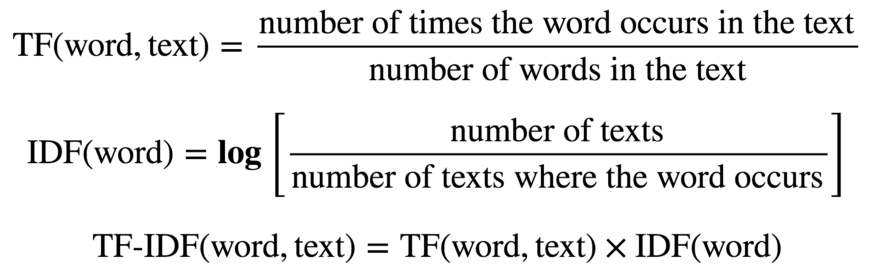

### TF

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tf_transformer = TfidfTransformer(use_idf=False)

In [14]:
tf_transformer.fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(11314, 130107)

### TF-IDF:

In [15]:
tfidf_transformer = TfidfTransformer()

In [16]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

## Use TF-IDF for Feature Extractions

In [17]:
vectorizer = TfidfVectorizer(max_df = 0.75, ngram_range=(1,2))

In [18]:
train_features = vectorizer.fit_transform(processed_train_data)
test_features = vectorizer.transform(processed_test_data)

# 4. Training a classifier (using Pipeline)

### Helper Functions

Now we define some functions that we will use to represent multiple models

In [19]:
# create a space to store all model evaluation
reports = []

In [20]:
# Confusion Matrix
# Note: normalize can have values: None (no normalization), 'true' (normalizing rows), 'pred' (normalize columns)
def draw_confusion_matrix(target, predicted, target_names = twenty_test.target_names, normalize = None, clf_name = 'Classifier'):
    cm = metrics.confusion_matrix(target, predicted, normalize = normalize)
    df_cm = pd.DataFrame(cm, index = [i for i in target_names],
                      columns = target_names)
    plt.figure(figsize = (20,10))
    sns.heatmap(df_cm, annot=True, fmt = ".2f")
    plt.title(clf_name)
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    plt.show()

In [21]:
# Benchmark print the report of model effectiveness and visualize the result.

def benchmark(grid_search, clf_name, X_train = train_features, y_train = twenty_train.target, X_test = test_features, y_test = twenty_test.target, vectorizer = vectorizer, ensemble=False):
    print('=' * 80)
    print(clf_name)
    print()
    
    report = []
    
    print('-' * 80)
    report.append(clf_name)
    
    #Training time
    t0 = time()
    grid_search.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    report.append(train_time)

    #Test time
    t0 = time()
    pred = grid_search.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    report.append(test_time)
    
    #Accuracy calculation
    accuracy = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % accuracy)
    report.append(accuracy)
    
    #Precision calculation
    precision = metrics.precision_score(y_test, pred, average = "micro")
    print("Precision: %0.3f" % accuracy)
    report.append(precision)
    
    #Recall calculation
    recall = metrics.precision_score(y_test, pred, average = "micro")
    print("Recall: %0.3f" % recall)
    report.append(recall)
    
    #F1 Score Calculation
    f1_score = metrics.f1_score(y_test, pred, average = 'micro')
    print("f1_score: %0.3f" % f1_score)
    report.append(f1_score)
    
    #Mathew Correlation Coefficients
    mathew = metrics.matthews_corrcoef(y_test, pred)
    print("Mathew Correlation Coefficients: %0.3f" % mathew)
    report.append(mathew)
    
    #Add the numbers to the overall reports for comparison
    reports.append(report)
    
    print('-' * 80)
    print()
    
    #Report each class by different metrics
    print(f'{clf_name} Classification Report')
    print(metrics.classification_report(y_test, pred, target_names=twenty_test.target_names))
    print('-' * 80)
    print()
    
    if not ensemble:
        clf = grid_search.best_estimator_
        feature_names = vectorizer.get_feature_names()
        #Print top 10 Keywords per class.
        if hasattr(clf, 'coef_'):
            print("Top 10 keywords per class")
            for (i, label) in enumerate(twenty_train.target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print("%s: %s" % (label, ",".join([feature_names[idx] for idx in top10])))
            print('-' * 80)

    print('=' * 80)
    
    #Confusion Matrix
    draw_confusion_matrix(twenty_test.target, pred, normalize = 'true', clf_name = clf_name)
    
    if not ensemble:
        return clf, pred
    else:
        return grid_search, pred

## 4.1 Linear Model

### Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
nb_clf = MultinomialNB()
params = {'alpha': [.001]}
grid_search_NB = GridSearchCV(estimator = nb_clf, param_grid = params, n_jobs = -1, verbose = False)

Multinomial Naive Bayes

--------------------------------------------------------------------------------
train time: 8.300s
test time:  0.116s
accuracy:   0.831
Precision: 0.831
Recall: 0.831
f1_score: 0.831
Mathew Correlation Coefficients: 0.822
--------------------------------------------------------------------------------

Multinomial Naive Bayes Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.85      0.85       319
           comp.graphics       0.68      0.71      0.69       389
 comp.os.ms-windows.misc       0.72      0.64      0.68       394
comp.sys.ibm.pc.hardware       0.65      0.73      0.69       392
   comp.sys.mac.hardware       0.78      0.81      0.79       385
          comp.windows.x       0.81      0.79      0.80       395
            misc.forsale       0.80      0.83      0.81       390
               rec.autos       0.88      0.86      0.87       396
         rec.motorcycles     

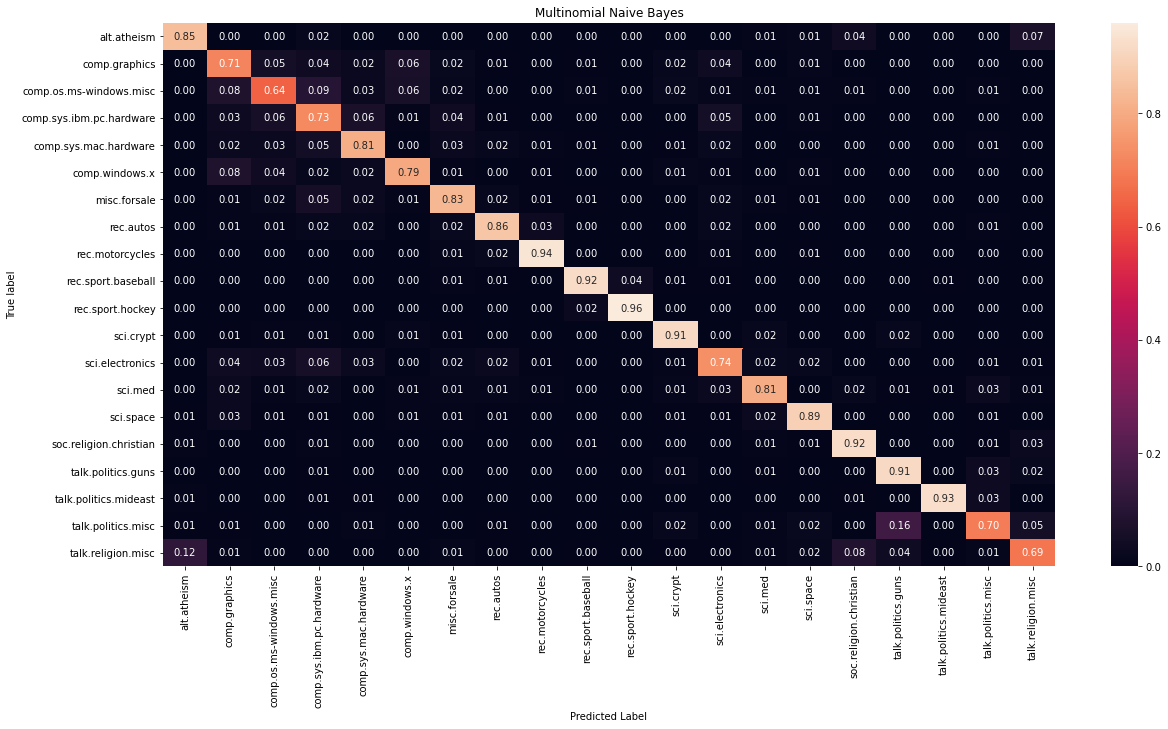

In [24]:
nb_clf, nb_pred = benchmark(grid_search_NB, 'Multinomial Naive Bayes')

### Logistic Regression

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
logReg_clf = SGDClassifier()
params_logReg = {'loss': ['log']}
grid_search_logReg = GridSearchCV(estimator = logReg_clf, param_grid = params_logReg, verbose = False)

Logistic Regression

--------------------------------------------------------------------------------
train time: 33.185s
test time:  0.121s
accuracy:   0.823
Precision: 0.823
Recall: 0.823
f1_score: 0.823
Mathew Correlation Coefficients: 0.814
--------------------------------------------------------------------------------

Logistic Regression Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.79      0.75      0.77       319
           comp.graphics       0.70      0.79      0.74       389
 comp.os.ms-windows.misc       0.73      0.72      0.73       394
comp.sys.ibm.pc.hardware       0.71      0.73      0.72       392
   comp.sys.mac.hardware       0.81      0.79      0.80       385
          comp.windows.x       0.84      0.76      0.79       395
            misc.forsale       0.74      0.85      0.79       390
               rec.autos       0.91      0.88      0.89       396
         rec.motorcycles       0.95 

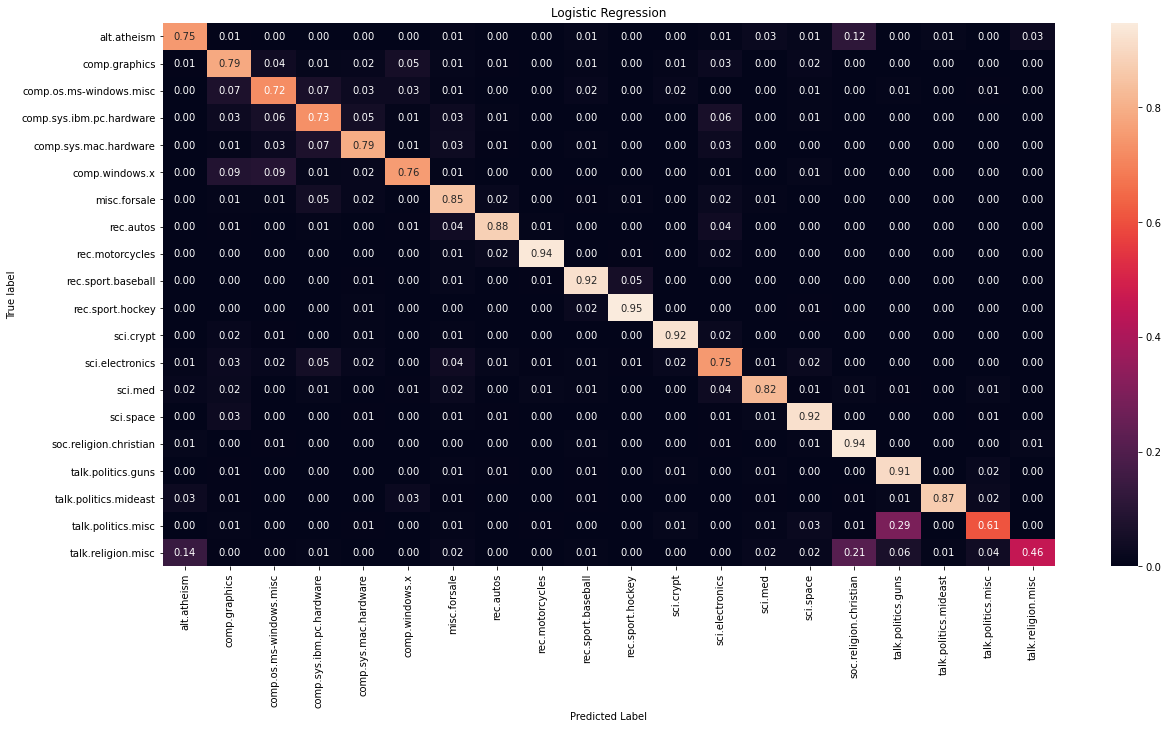

In [27]:
logReg_clf, logReg_pred = benchmark(grid_search_logReg, 'Logistic Regression')

### Ridge Classification

In [28]:
from sklearn.linear_model import RidgeClassifier

In [29]:
rc_clf = RidgeClassifier()
params_rc = {'alpha': [0.1]}
grid_search_RC = GridSearchCV(estimator = rc_clf, param_grid = params_rc, n_jobs = -1)

Ridge Classification

--------------------------------------------------------------------------------
train time: 113.805s
test time:  0.115s
accuracy:   0.858
Precision: 0.858
Recall: 0.858
f1_score: 0.858
Mathew Correlation Coefficients: 0.851
--------------------------------------------------------------------------------

Ridge Classification Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.78      0.82       319
           comp.graphics       0.78      0.79      0.79       389
 comp.os.ms-windows.misc       0.75      0.74      0.74       394
comp.sys.ibm.pc.hardware       0.72      0.77      0.74       392
   comp.sys.mac.hardware       0.82      0.86      0.84       385
          comp.windows.x       0.87      0.77      0.82       395
            misc.forsale       0.82      0.91      0.86       390
               rec.autos       0.94      0.91      0.92       396
         rec.motorcycles       0.

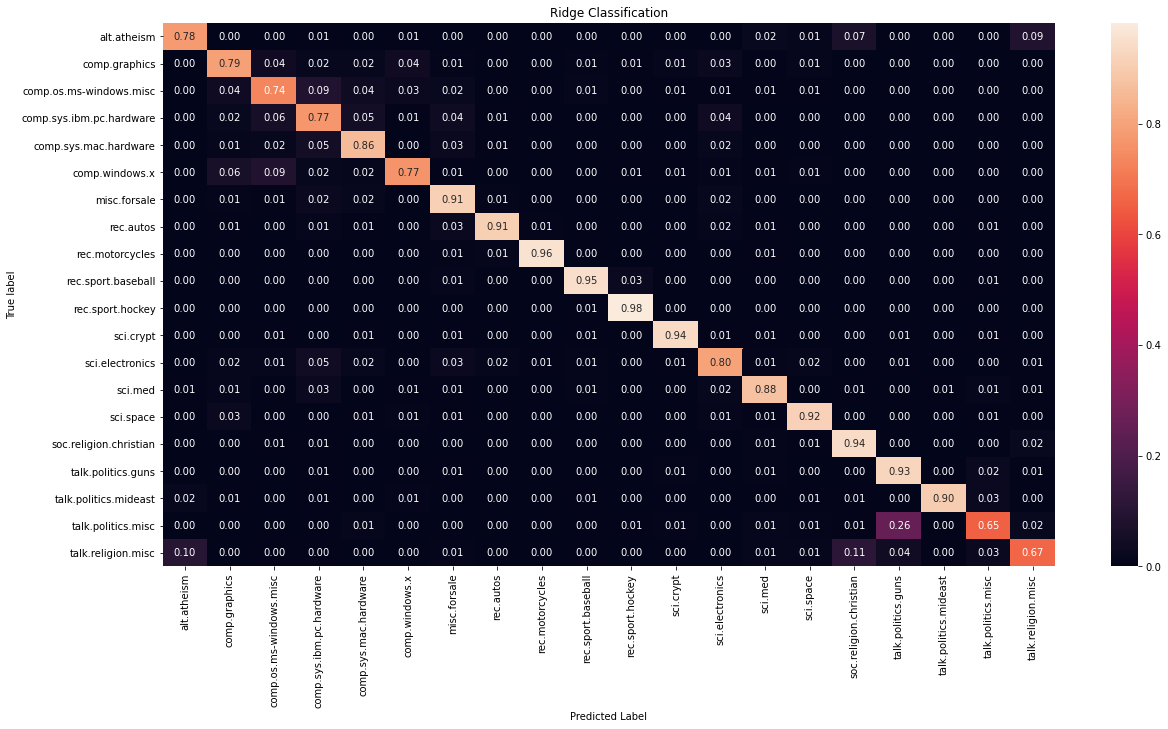

In [30]:
rc_clf, rc_pred = benchmark(grid_search_RC, 'Ridge Classification')

### Perceptron

In [31]:
from sklearn.linear_model import Perceptron

In [32]:
perceptron_clf = Perceptron()
params_perceptron = {'alpha': [0.001], 'penalty': ['elasticnet']}
grid_search_perceptron = GridSearchCV(estimator = perceptron_clf, param_grid = params_perceptron, n_jobs = -1)

Perceptron

--------------------------------------------------------------------------------
train time: 30.128s
test time:  0.137s
accuracy:   0.575
Precision: 0.575
Recall: 0.575
f1_score: 0.575
Mathew Correlation Coefficients: 0.556
--------------------------------------------------------------------------------

Perceptron Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.61      0.55      0.58       319
           comp.graphics       0.62      0.38      0.47       389
 comp.os.ms-windows.misc       0.28      0.67      0.39       394
comp.sys.ibm.pc.hardware       0.58      0.26      0.35       392
   comp.sys.mac.hardware       0.41      0.68      0.51       385
          comp.windows.x       0.62      0.44      0.51       395
            misc.forsale       0.62      0.46      0.53       390
               rec.autos       0.72      0.57      0.63       396
         rec.motorcycles       0.45      0.88      0.5

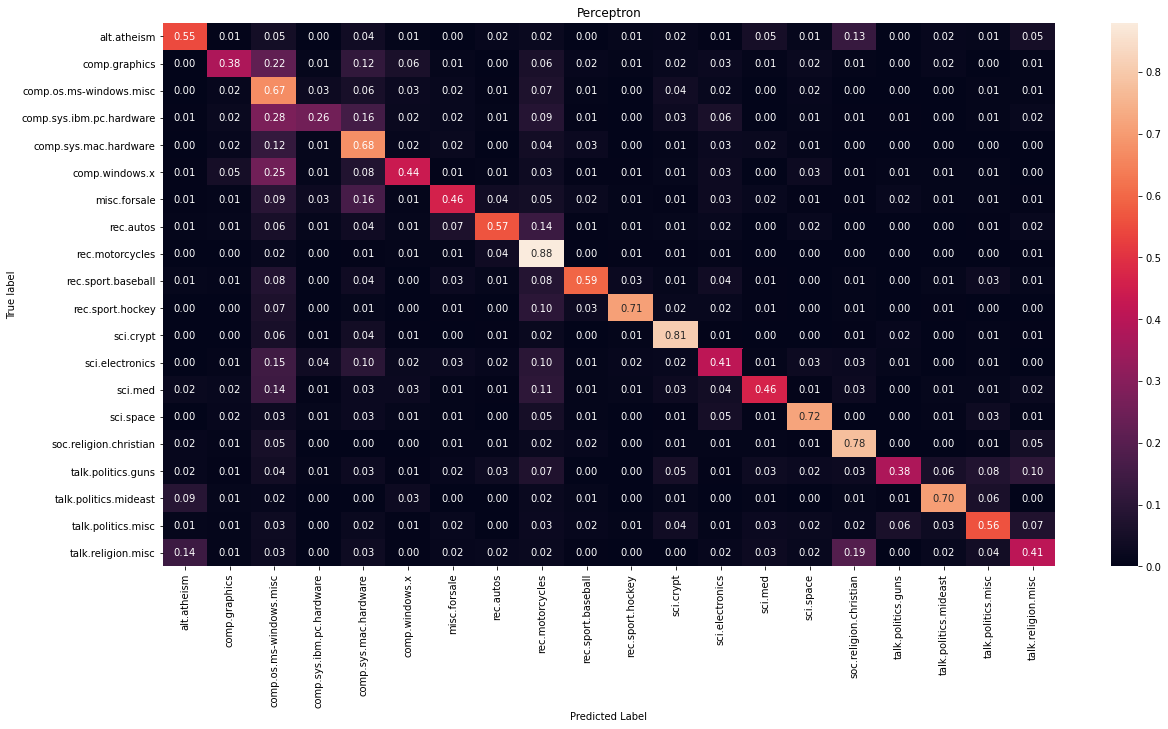

In [33]:
perceptron_clf, perceptron_pred = benchmark(grid_search_perceptron, "Perceptron")

### Passive Aggressive Classifier

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [35]:
pa_clf = PassiveAggressiveClassifier()
params_PA = {'C': [0.1]}
grid_search_PA = GridSearchCV(estimator = pa_clf, param_grid = params_PA, n_jobs = -1)

Passive Aggressive Classifier

--------------------------------------------------------------------------------
train time: 36.458s
test time:  0.142s
accuracy:   0.858
Precision: 0.858
Recall: 0.858
f1_score: 0.858
Mathew Correlation Coefficients: 0.851
--------------------------------------------------------------------------------

Passive Aggressive Classifier Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.77      0.81       319
           comp.graphics       0.76      0.80      0.78       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.75      0.74       392
   comp.sys.mac.hardware       0.80      0.85      0.82       385
          comp.windows.x       0.87      0.79      0.83       395
            misc.forsale       0.82      0.89      0.85       390
               rec.autos       0.93      0.91      0.92       396
         rec.mot

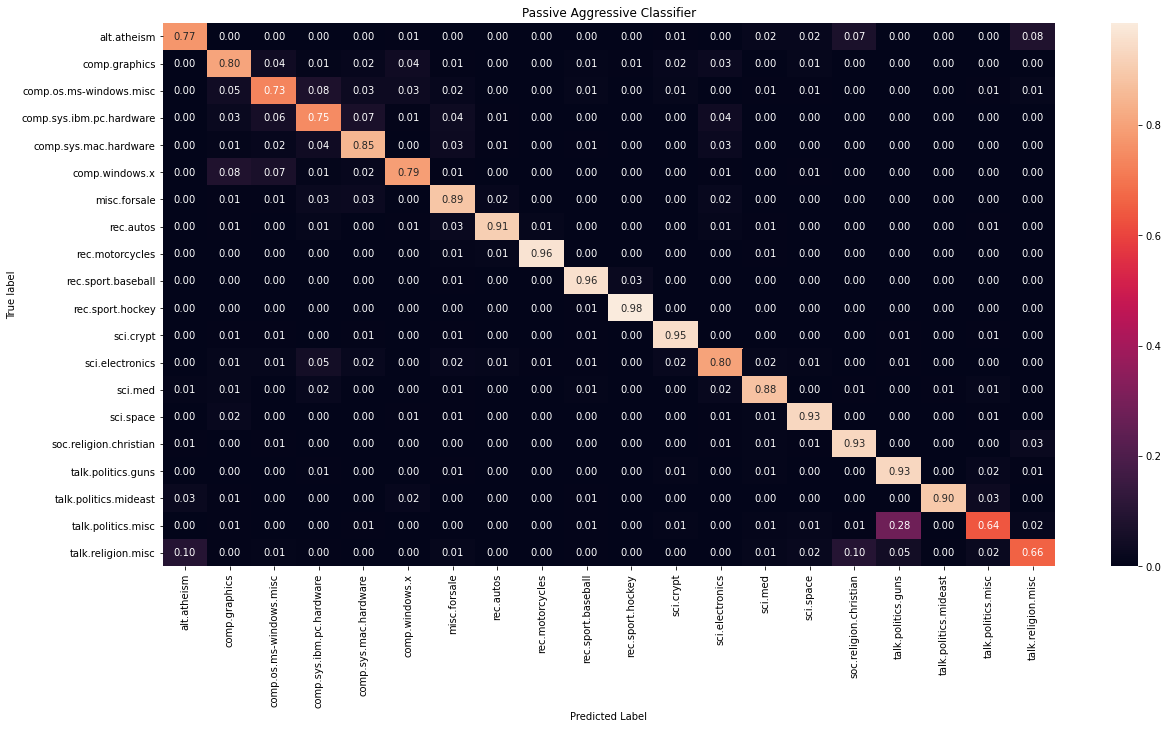

In [36]:
pa_clf, pa_pred = benchmark(grid_search_PA, "Passive Aggressive Classifier")

## 4.2 Non-parametric Model

### K Nearest Neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn_clf = KNeighborsClassifier()
params_knn = {'n_neighbors': [10]}
grid_search_KNN = GridSearchCV(estimator = knn_clf, param_grid = params_knn, n_jobs = -1)

K Neighbors Classifier

--------------------------------------------------------------------------------
train time: 5.625s
test time:  8.410s
accuracy:   0.670
Precision: 0.670
Recall: 0.670
f1_score: 0.670
Mathew Correlation Coefficients: 0.653
--------------------------------------------------------------------------------

K Neighbors Classifier Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.59      0.79      0.68       319
           comp.graphics       0.53      0.62      0.57       389
 comp.os.ms-windows.misc       0.55      0.56      0.55       394
comp.sys.ibm.pc.hardware       0.48      0.58      0.52       392
   comp.sys.mac.hardware       0.54      0.49      0.51       385
          comp.windows.x       0.71      0.67      0.69       395
            misc.forsale       0.49      0.40      0.44       390
               rec.autos       0.71      0.64      0.67       396
         rec.motorcycles       

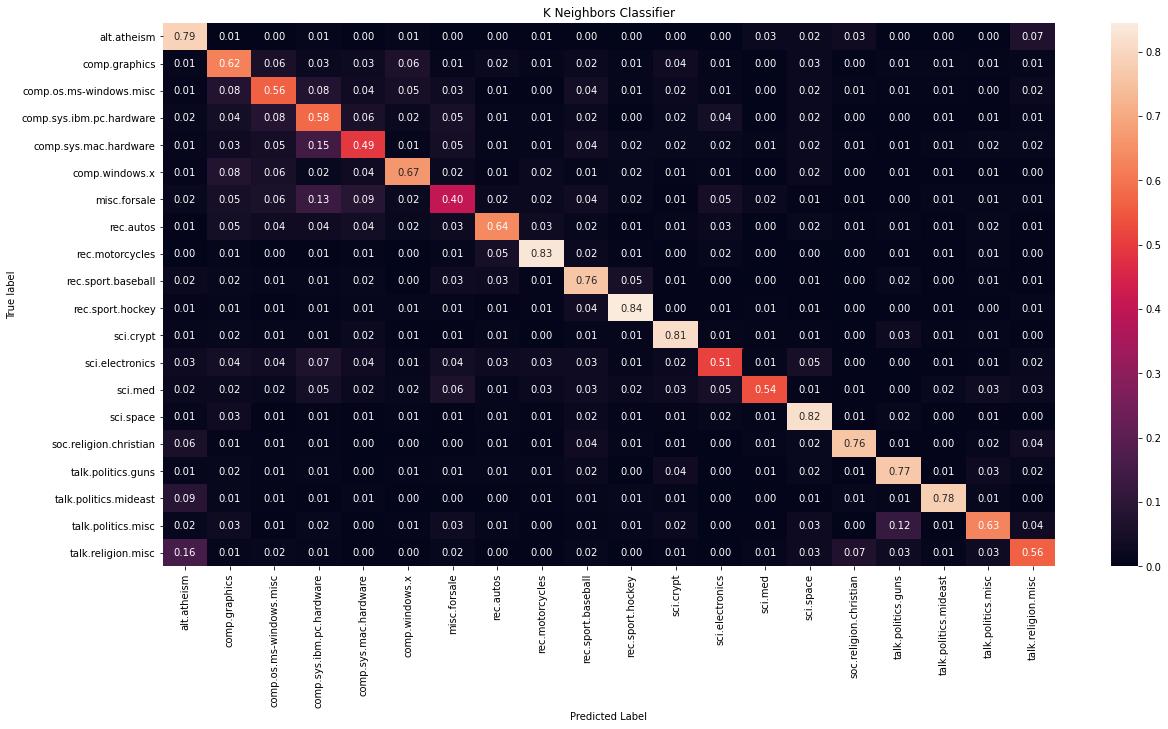

In [39]:
knn_clf, knn_pred = benchmark(grid_search_KNN, "K Neighbors Classifier")

### SVM

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
svm_clf = SGDClassifier()
params_svm = {'penalty': ['l2'], 'alpha': [0.0001]}
grid_search_SVM = GridSearchCV(estimator = svm_clf, param_grid = params_svm, n_jobs = -1)

SVM

--------------------------------------------------------------------------------
train time: 19.757s
test time:  0.116s
accuracy:   0.856
Precision: 0.856
Recall: 0.856
f1_score: 0.856
Mathew Correlation Coefficients: 0.849
--------------------------------------------------------------------------------

SVM Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.78      0.82       319
           comp.graphics       0.77      0.78      0.77       389
 comp.os.ms-windows.misc       0.77      0.74      0.75       394
comp.sys.ibm.pc.hardware       0.74      0.75      0.74       392
   comp.sys.mac.hardware       0.83      0.84      0.84       385
          comp.windows.x       0.87      0.78      0.82       395
            misc.forsale       0.81      0.90      0.85       390
               rec.autos       0.92      0.90      0.91       396
         rec.motorcycles       0.96      0.96      0.96       398
  

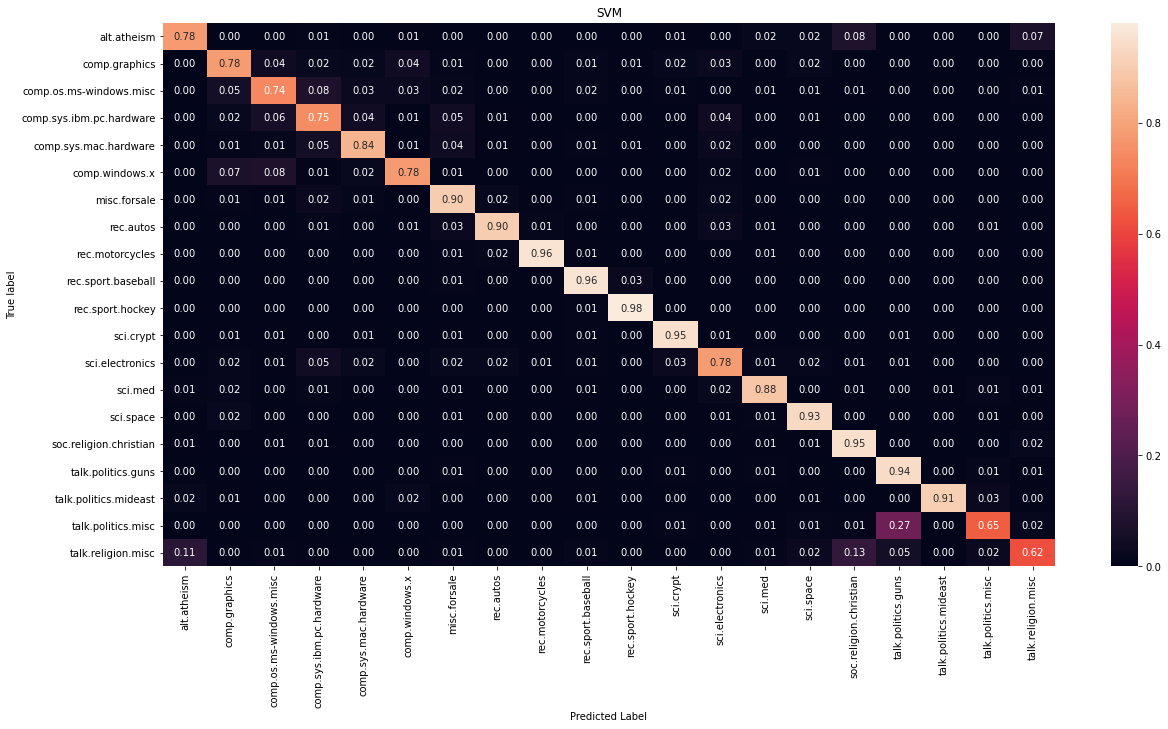

In [42]:
svm_clf, svm_pred = benchmark(grid_search_SVM, 'SVM')

### Linear Support Vector Classifier

In [43]:
from sklearn.svm import LinearSVC

In [44]:
svc_clf = LinearSVC()
params_svc = {'C': [10]}
grid_search_SVC = GridSearchCV(estimator = svc_clf, param_grid = params_svc, n_jobs = -1)

LinearSVC

--------------------------------------------------------------------------------
train time: 153.955s
test time:  0.069s
accuracy:   0.857
Precision: 0.857
Recall: 0.857
f1_score: 0.857
Mathew Correlation Coefficients: 0.850
--------------------------------------------------------------------------------

LinearSVC Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.78      0.81       319
           comp.graphics       0.77      0.80      0.78       389
 comp.os.ms-windows.misc       0.77      0.73      0.75       394
comp.sys.ibm.pc.hardware       0.73      0.77      0.75       392
   comp.sys.mac.hardware       0.80      0.85      0.82       385
          comp.windows.x       0.88      0.78      0.83       395
            misc.forsale       0.81      0.90      0.86       390
               rec.autos       0.93      0.90      0.91       396
         rec.motorcycles       0.97      0.96      0.96

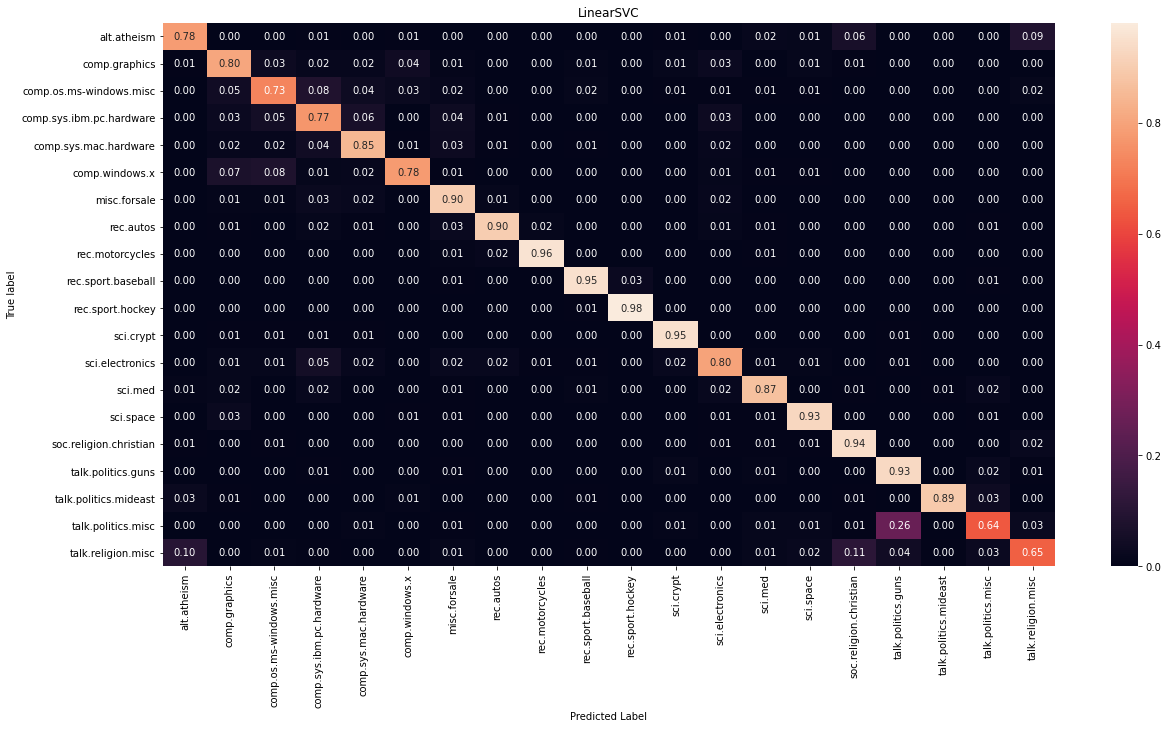

In [45]:
svc_clf,svc_pred = benchmark(grid_search_SVC, 'LinearSVC')

## 4.3 Tree-based Model

### Decision Tree

In [46]:
from sklearn import tree

In [47]:
DT_clf = tree.DecisionTreeClassifier()
grid_search_DT = GridSearchCV(estimator = DT_clf, param_grid = {}, cv = 2)

Decision Tree

--------------------------------------------------------------------------------
train time: 280.569s
test time:  0.060s
accuracy:   0.579
Precision: 0.579
Recall: 0.579
f1_score: 0.579
Mathew Correlation Coefficients: 0.556
--------------------------------------------------------------------------------

Decision Tree Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.52      0.55       319
           comp.graphics       0.45      0.48      0.47       389
 comp.os.ms-windows.misc       0.53      0.59      0.56       394
comp.sys.ibm.pc.hardware       0.39      0.42      0.40       392
   comp.sys.mac.hardware       0.55      0.55      0.55       385
          comp.windows.x       0.55      0.47      0.51       395
            misc.forsale       0.55      0.61      0.58       390
               rec.autos       0.56      0.57      0.56       396
         rec.motorcycles       0.71      0.75  

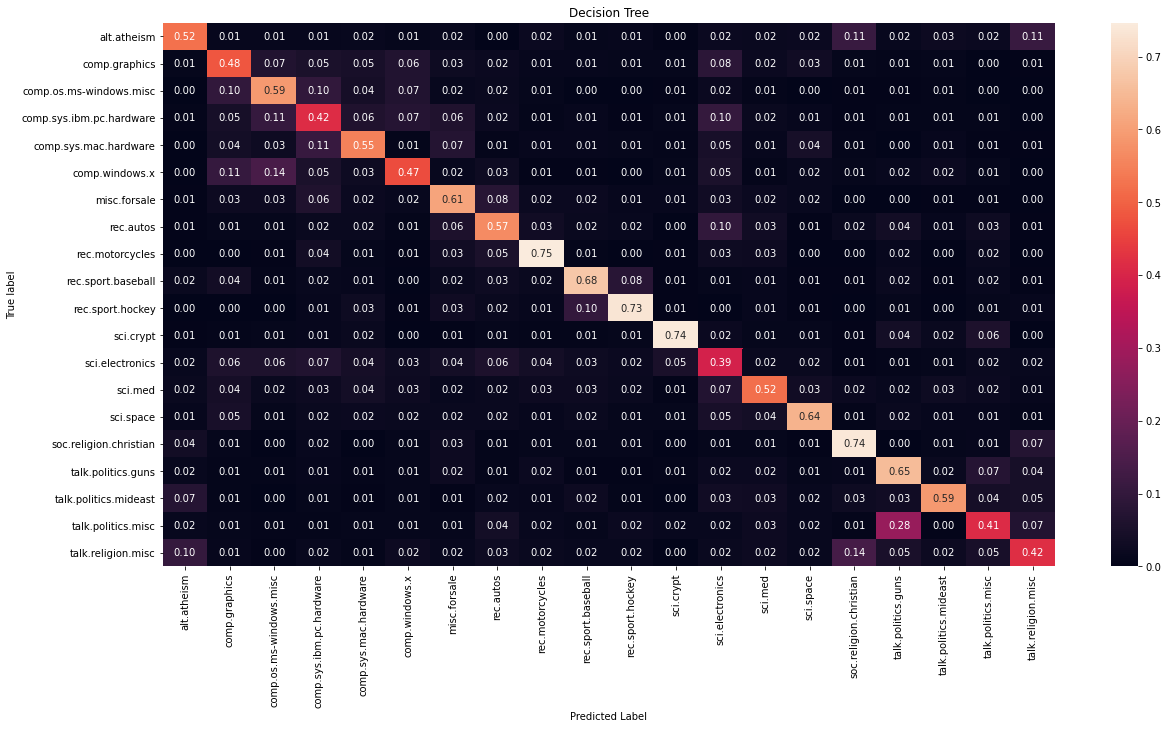

In [48]:
DT_clf, DT_pred = benchmark(grid_search_DT, 'Decision Tree')

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_clf = RandomForestClassifier(n_estimators=100)
grid_search_RF = GridSearchCV(estimator = rf_clf, param_grid = {}, cv = 2)

Random Forest

--------------------------------------------------------------------------------
train time: 544.528s
test time:  2.746s
accuracy:   0.778
Precision: 0.778
Recall: 0.778
f1_score: 0.778
Mathew Correlation Coefficients: 0.767
--------------------------------------------------------------------------------

Random Forest Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.67      0.72       319
           comp.graphics       0.59      0.74      0.66       389
 comp.os.ms-windows.misc       0.69      0.71      0.70       394
comp.sys.ibm.pc.hardware       0.65      0.66      0.66       392
   comp.sys.mac.hardware       0.72      0.75      0.73       385
          comp.windows.x       0.79      0.73      0.76       395
            misc.forsale       0.65      0.91      0.76       390
               rec.autos       0.85      0.82      0.83       396
         rec.motorcycles       0.92      0.91  

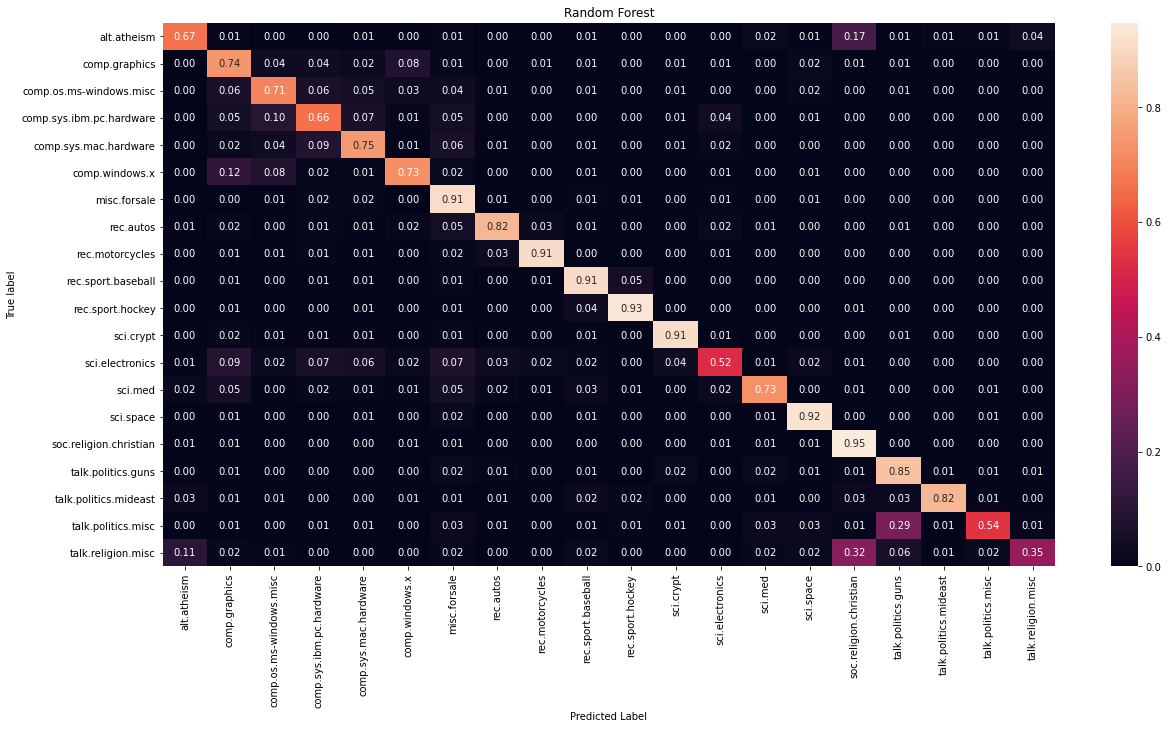

In [51]:
rf_clf, rf_pred = benchmark(grid_search_RF, "Random Forest")

## XGBoost

In [52]:
import xgboost as xgb

In [53]:
xgb_clf = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
grid_search_XGB = GridSearchCV(xgb_clf, param_grid = {}, cv = 2)

XGBoost

--------------------------------------------------------------------------------
train time: 2608.323s
test time:  1.865s
accuracy:   0.762
Precision: 0.762
Recall: 0.762
f1_score: 0.762
Mathew Correlation Coefficients: 0.749
--------------------------------------------------------------------------------

XGBoost Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.65      0.69       319
           comp.graphics       0.62      0.67      0.64       389
 comp.os.ms-windows.misc       0.69      0.72      0.71       394
comp.sys.ibm.pc.hardware       0.56      0.68      0.61       392
   comp.sys.mac.hardware       0.73      0.77      0.75       385
          comp.windows.x       0.82      0.68      0.75       395
            misc.forsale       0.79      0.81      0.80       390
               rec.autos       0.79      0.81      0.80       396
         rec.motorcycles       0.86      0.86      0.86   

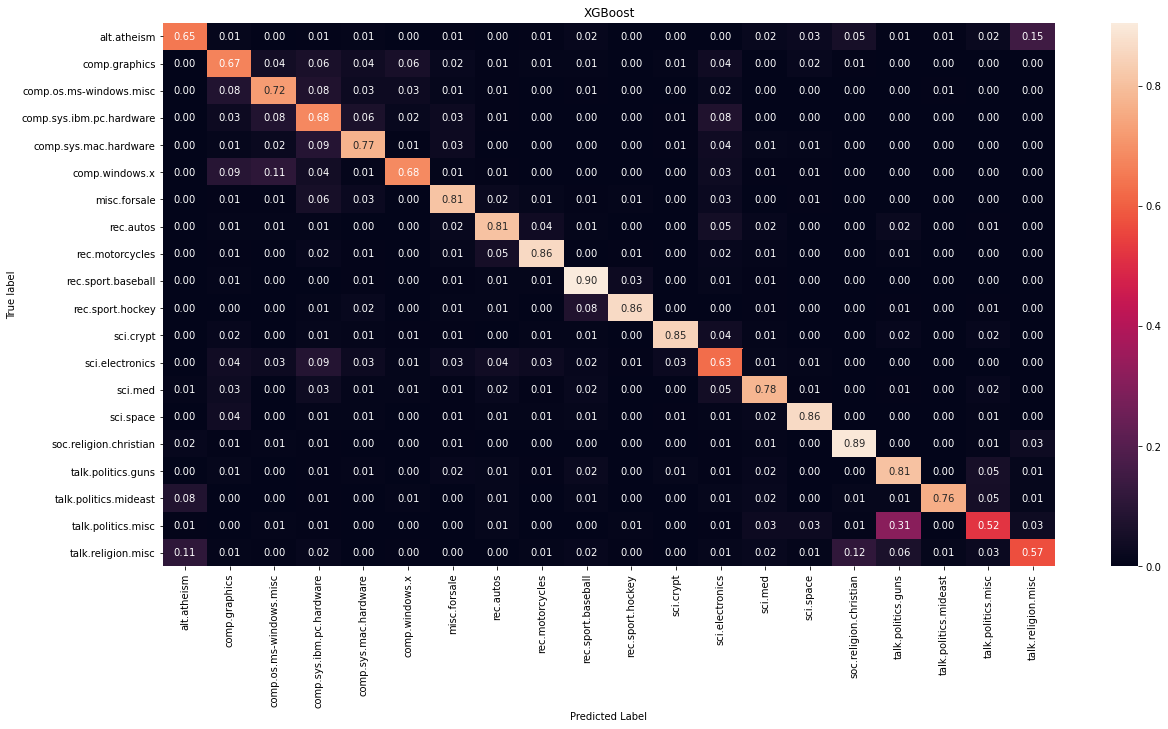

In [54]:
xgb_clf, xgb_pred = benchmark(grid_search_XGB ,'XGBoost')

## 4.4 Model Ensemble

### With Voting Ensemble

In [55]:
from sklearn.ensemble import VotingClassifier

In [56]:
estimators = [
    ('svc', svc_clf),
    ('pa', pa_clf),
    ('rc', rc_clf),
    ('svm', svm_clf)
]

In [57]:
voting_ensemble = VotingClassifier(estimators, voting='hard')

Voting Ensemble

--------------------------------------------------------------------------------
train time: 99.932s
test time:  0.542s
accuracy:   0.859
Precision: 0.859
Recall: 0.859
f1_score: 0.859
Mathew Correlation Coefficients: 0.852
--------------------------------------------------------------------------------

Voting Ensemble Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.78      0.81       319
           comp.graphics       0.76      0.81      0.78       389
 comp.os.ms-windows.misc       0.76      0.75      0.75       394
comp.sys.ibm.pc.hardware       0.73      0.77      0.75       392
   comp.sys.mac.hardware       0.81      0.85      0.83       385
          comp.windows.x       0.88      0.78      0.83       395
            misc.forsale       0.81      0.90      0.86       390
               rec.autos       0.93      0.91      0.92       396
         rec.motorcycles       0.97      0.9

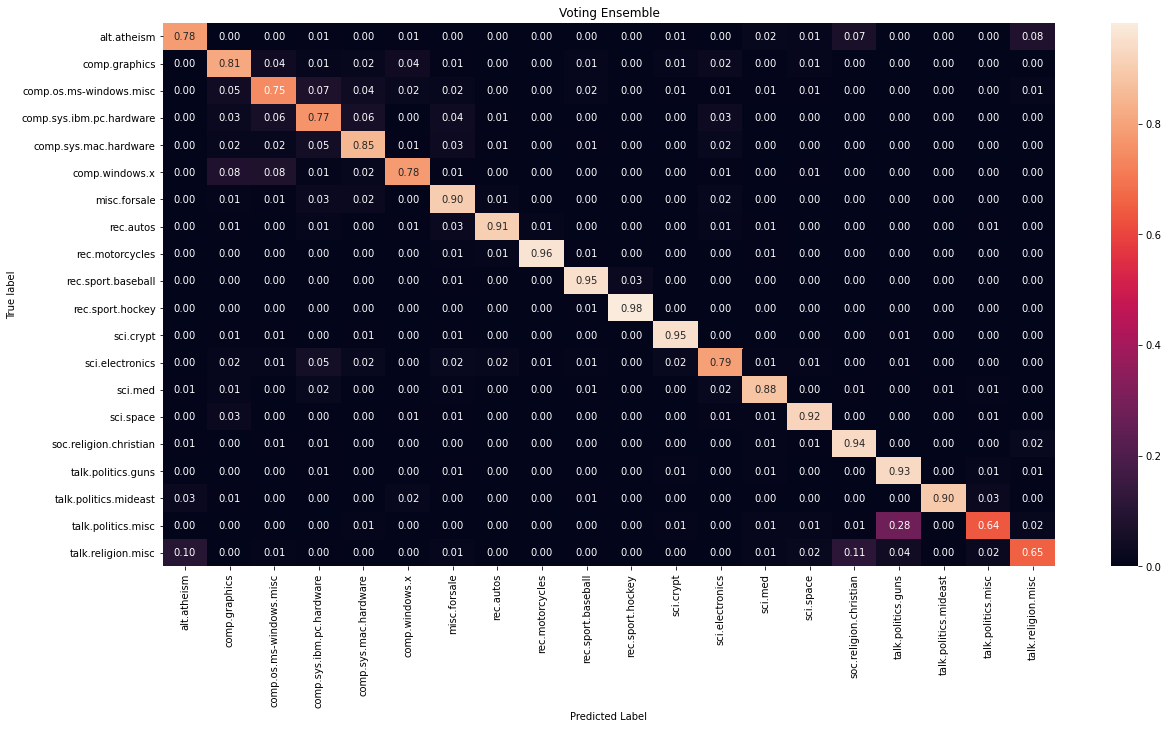

In [58]:
voting_clf, voting_pred = benchmark(voting_ensemble, "Voting Ensemble", ensemble = True)

### With Stacking Ensemble

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
stacking_ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter = 1000))

Stacking Ensemble

--------------------------------------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train time: 519.491s
test time:  0.492s
accuracy:   0.862
Precision: 0.862
Recall: 0.862
f1_score: 0.862
Mathew Correlation Coefficients: 0.855
--------------------------------------------------------------------------------

Stacking Ensemble Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.80      0.83       319
           comp.graphics       0.75      0.80      0.77       389
 comp.os.ms-windows.misc       0.83      0.69      0.76       394
comp.sys.ibm.pc.hardware       0.72      0.81      0.76       392
   comp.sys.mac.hardware       0.81      0.85      0.83       385
          comp.windows.x       0.88      0.81      0.84       395
            misc.forsale       0.80      0.89      0.84       390
               rec.autos       0.94      0.91      0.93       396
         rec.motorcycles       0.97      0.96      0.96       398
      rec.sport.baseball       0.92      0.96      0.94       397
       

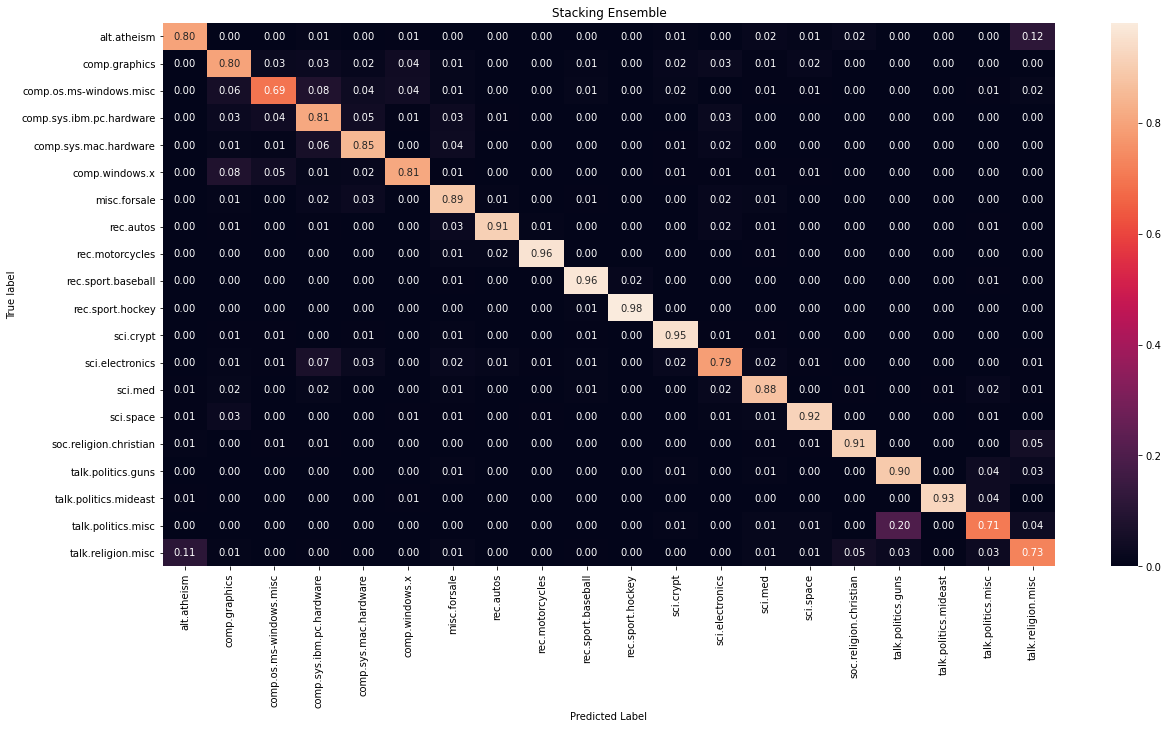

In [61]:
stacking_clf, stacking_pred = benchmark(stacking_ensemble, "Stacking Ensemble", ensemble = True)

# 5. Summary

In [62]:
summary = pd.DataFrame(reports, columns = ["Classifier", "Train_time", "Test_time", "Accuracy", "Precision", "Recall", "F1", "MCC"])

In [63]:
summary.set_index('Classifier')
sorted_summary = summary.sort_values(by=['F1', 'Accuracy', 'Precision', 'Recall', 'MCC', 'Train_time', 'Test_time'], ascending = False, ignore_index = True)

In [64]:
sorted_summary

,Classifier,Train_time,Test_time,Accuracy,Precision,Recall,F1,MCC
0,Stacking Ensemble,519.490873,0.491536,0.862321,0.862321,0.862321,0.862321,0.855125
1,Voting Ensemble,99.931931,0.541594,0.859267,0.859267,0.859267,0.859267,0.851935
2,Ridge Classification,113.804814,0.115001,0.858471,0.858471,0.858471,0.858471,0.851078
3,Passive Aggressive Classifier,36.457670,0.141848,0.857939,0.857939,0.857939,0.857939,0.850512
4,LinearSVC,153.954818,0.069443,0.857408,0.857408,0.857408,0.857408,0.849964
5,SVM,19.757343,0.116123,0.856081,0.856081,0.856081,0.856081,0.848591
6,Multinomial Naive Bayes,8.300020,0.115551,0.830855,0.830855,0.830855,0.830855,0.821925
7,Logistic Regression,33.184770,0.121303,0.822756,0.822756,0.822756,0.822756,0.813601
8,Random Forest,544.528411,2.746062,0.777616,0.777616,0.777616,0.777616,0.766530
9,XGBoost,2608.322928,1.865140,0.761816,0.761816,0.761816,0.761816,0.749358
